# Imports

In [1]:
import numpy as np
import pandas as pd
import librosa as lb
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm

# READ THE DATA

In [6]:
metadata = pd.read_csv('./input/notes_v2/n_metadata.csv')
print(f'Samples: {metadata.shape[0]}\nColumns: {metadata.shape[1]}')
metadata.head()

Samples num: 234
Columns num: 3


,Sample,Class_ID,Class
0,./input/notes_v2/A/A1.wav,1,A
1,./input/notes_v2/A/A1.wav_000.wav,1,A
2,./input/notes_v2/A/A1.wav_010.wav,1,A
3,./input/notes_v2/A/A2.wav,1,A
4,./input/notes_v2/A/A2.wav_001.wav,1,A


# Getting information about classes

In [7]:
classes = metadata.groupby('Class_ID')['Class'].unique()
classes

Class_ID
1           [A]
2           [B]
3           [C]
4           [D]
5           [E]
6           [F]
7           [G]
8      [Barrel]
9       [Flage]
10    [PoffHon]
11       [Slap]
12      [Slide]
13    [Silence]
Name: Class, dtype: object

# CREATING A FUNCTION TO EXTRACT DATA FROM SAMPLES

In [8]:
def feature_exctractor(path: str) -> np.array:
    data, _ = lb.load(path)
    data = lb.feature.mfcc(data, n_mfcc=128)
    data= np.mean(data, axis=1)

    return data

# DATA EXTRACTION

In [ ]:
x, y = [], []

for i, rows in tqdm(metadata.iterrows()):
    path = rows['Sample']
    x.append(feature_exctractor(path))
    y.append(rows['Class_ID'])

x = np.array(x)
y = np.array(y)

print(f'Features: {x.shape}\nTarget: {y.shape}')

# TRANSFER OF TARGET CLASSES TO CATEGORIAL TYPE

In [10]:
y = to_categorical(y)
y.shape

(234, 14)

# SPLITTING INTO TRAINING / TEST / VALIDATION DATA

In [11]:
xtrainval, xtest, ytrainval, ytest = train_test_split(x, y, test_size=0.1, stratify=y, random_state=42)
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrainval, ytrainval, test_size=0.2, stratify=ytrainval,random_state=42)

print('\nNumber of samples for Train set :',xtrain.shape[0])
print('Number of samples for Validation set :',xvalid.shape[0])
print('Number of samples for Test set :',xtest.shape[0])


Number of samples for Train set : 168
Number of samples for Validation set : 42
Number of samples for Test set : 24


# MODEL ARCHITECTURE

In [12]:
model = Sequential(
    [
        layers.Dense(1000, activation='relu', input_shape=(128,)),
        layers.Dense(750, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(250, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(14, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              129000    
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 14)                7

# MODEL COMPILATION AND TRAINING

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
training = model.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), epochs=20)

Epoch 1/20
6/6 [==============================] - 2s 53ms/step - loss: 14.7601 - accuracy: 0.1012 - val_loss: 9.4500 - val_accuracy: 0.0714
Epoch 2/20
6/6 [==============================] - 0s 23ms/step - loss: 9.0730 - accuracy: 0.0714 - val_loss: 5.7194 - val_accuracy: 0.0714
Epoch 3/20
6/6 [==============================] - 0s 21ms/step - loss: 6.2022 - accuracy: 0.0595 - val_loss: 3.6042 - val_accuracy: 0.1190
Epoch 4/20
6/6 [==============================] - 0s 24ms/step - loss: 3.4670 - accuracy: 0.0714 - val_loss: 2.6473 - val_accuracy: 0.1429
Epoch 5/20
6/6 [==============================] - 0s 23ms/step - loss: 2.6939 - accuracy: 0.1964 - val_loss: 2.4438 - val_accuracy: 0.1429
Epoch 6/20
6/6 [==============================] - 0s 23ms/step - loss: 2.3717 - accuracy: 0.1429 - val_loss: 2.1462 - val_accuracy: 0.4048
Epoch 7/20
6/6 [==============================] - 0s 27ms/step - loss: 2.0733 - accuracy: 0.3810 - val_loss: 1.8103 - val_accuracy: 0.5000
Epoch 8/20
6/6 [==========

# VERIFICATION OF THE MODEL RESULTS

In [14]:
train_hist = pd.DataFrame(training.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,14.760097,0.101190,9.449974,0.071429
1,9.073027,0.071429,5.719422,0.071429
2,6.202248,0.059524,3.604184,0.119048
3,3.467001,0.071429,2.647268,0.142857
4,2.693926,0.196429,2.443763,0.142857
5,2.371745,0.142857,2.146179,0.404762
6,2.073320,0.380952,1.810314,0.500000
7,1.777688,0.363095,1.600097,0.500000
8,1.598668,0.511905,1.582850,0.476190
9,1.372004,0.613095,1.326120,0.619048


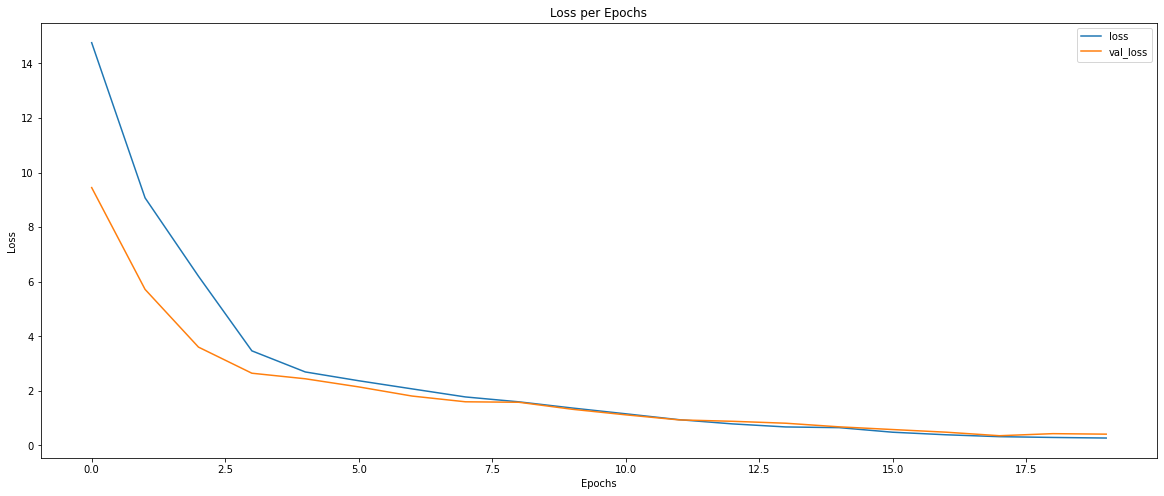

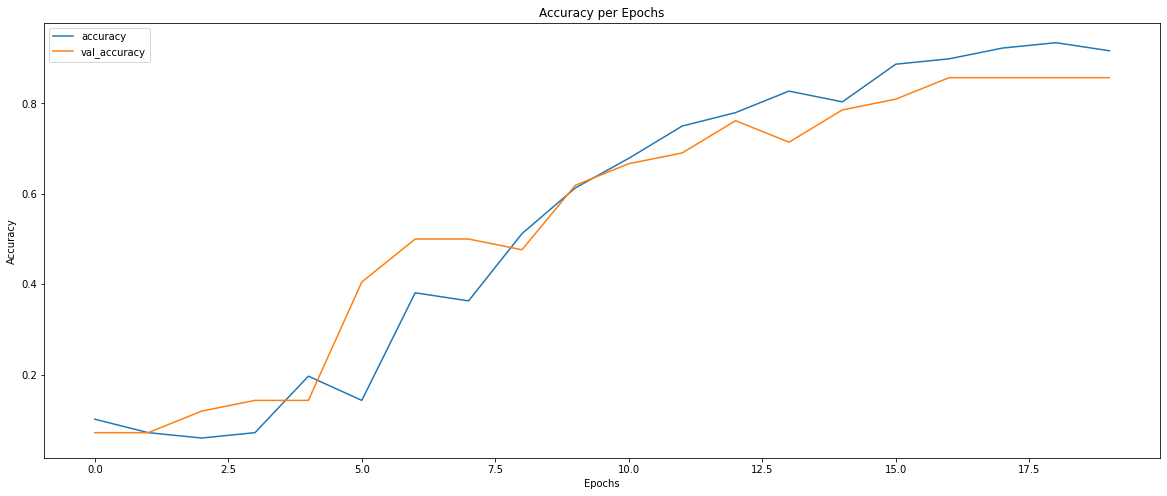

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(train_hist[['loss', 'val_loss']])
plt.legend(['loss', 'val_loss'])
plt.title('Loss per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(train_hist[['accuracy', 'val_accuracy']])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [16]:
ytrue = np.argmax(ytest, axis=1)
ypred = np.argmax(model.predict(xtest), axis=1)
print('\nConfusion Matrix: \n\n')
print(confusion_matrix(ytrue, ypred))
print('\n\nClassification Report: \n\n', classification_report(ytrue, ypred))



Confusion Matrix: 


[[2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]]


Classification Report: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         2
           8       0.33      0.50      0.40         2
           9       1.00      1.00      1.00         1
          10       1.00      1.

c:\Users\arsal\Documents\GitHub\GuitarGrapher_v2\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arsal\Documents\GitHub\GuitarGrapher_v2\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arsal\Documents\GitHub\GuitarGrapher_v2\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [17]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model\assets
